## Collect Data

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Requests to third parties

In [64]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT domain, COUNT(*) FROM domain_counts GROUP BY domain ORDER BY COUNT(*) DESC'

cursor.execute(query)

data1 = cursor.fetchall()
print("Total 3rd party domains: " + str(len(data1)) + "\n")
print("Domain\tCount")
print("----------------------------")
for domain, count in data1:
    print(f"{count}\t{domain}")

conn.close()

Total 3rd party domains: 537

Domain	Count
----------------------------
1922	media-amazon.com
1655	doubleclick.net
1332	googlesyndication.com
969	adsafeprotected.com
955	google.com
666	ztat.net
666	adobedtm.com
602	asadcdn.com
597	ssl-images-amazon.com
547	google-analytics.com
546	guim.co.uk
442	adnxs.com
424	rubiconproject.com
394	amazon-adsystem.com
353	gstatic.com
317	googletagmanager.com
313	criteo.com
311	outbrain.com
285	taboola.com
284	adform.net
244	2mdn.net
242	google.de
238	googletagservices.com
229	idcdn.de
228	creativecdn.com
223	teads.tv
216	facebook.com
208	cookielaw.org
197	aboutyou.cloud
193	smartadserver.com
191	cloudfront.net
187	pinterest.com
184	googleapis.com
178	tiktok.com
173	pubmatic.com
173	casalemedia.com
164	ctfassets.net
163	cxense.com
158	bounceexchange.com
153	snapchat.com
145	yieldlab.net
145	chartbeat.net
143	ioam.de
137	googleadservices.com
137	abtasty.com
136	glomex.com
135	xplosion.de
134	cnn.io
133	salesforce.com
132	otto.de
126	presage.io
121	bing.c

**Visualization**

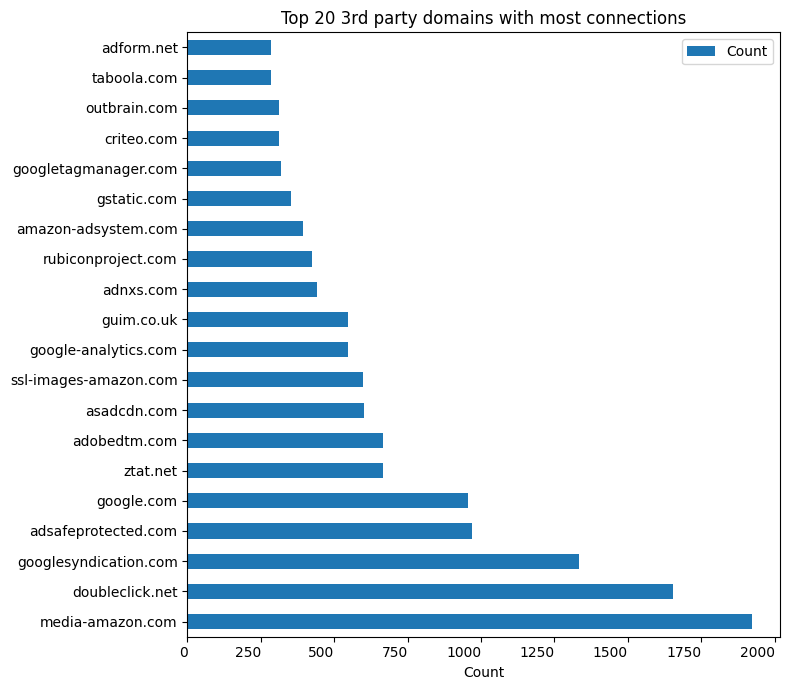

In [65]:
df = pd.DataFrame(data1, columns=['Domain', 'Count'])

df_top20 = df.head(20)

df_top20.plot(kind='barh', x='Domain', y='Count', figsize=(8, 7))

plt.title('Top 20 3rd party domains with most connections')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

### Websites with most connections to third party domains

In [22]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT host, COUNT(*), COUNT(DISTINCT domain) AS distinct_domains FROM domain_counts GROUP BY host ORDER BY COUNT(*) DESC'

cursor.execute(query)

data0 = cursor.fetchall()

print("Domain\tCount")
print("----------------------------")
for domain, count, distinct_domains in data0:
    print(f"{count}\t{domain}\t\t{distinct_domains}")

conn.close()

Domain	Count
----------------------------
2756	merkur.de		133
2675	amazon.de		17
2269	telegraph.co.uk		136
2267	theguardian.com		106
2054	bild.de		93
1868	faz.net		119
1773	thehindu.com		94
1716	sephora.de		56
1646	n-tv.de		79
1610	cnn.com		94
1385	sueddeutsche.de		103
1209	depot-online.de		84
1086	samsung.com		60
855	zalando.de		14
830	zeit.de		56
586	nike.com		48
551	uniqlo.com		43
465	hm.com		41
456	saturn.de		27
266	douglas.de		55


**Visualization**

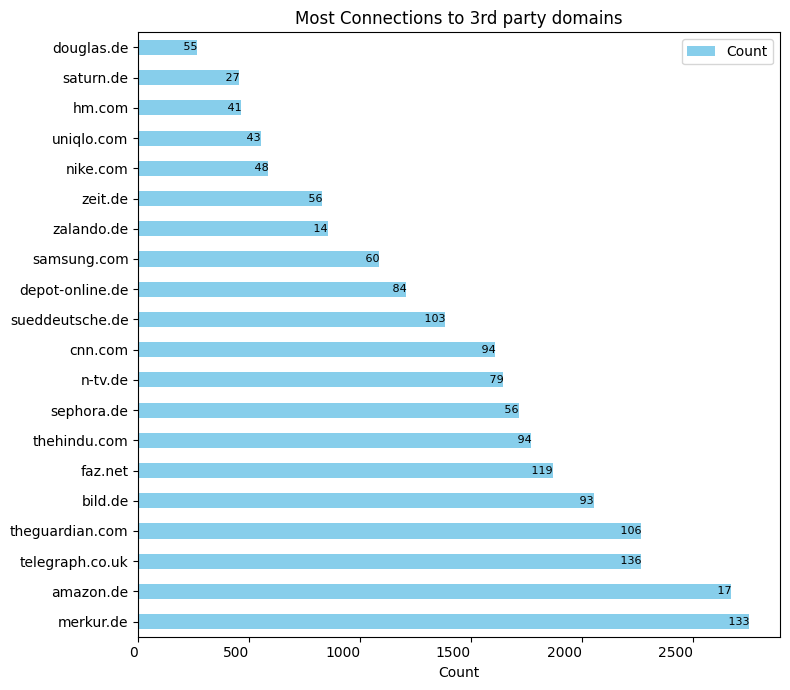

In [17]:
df = pd.DataFrame(data0, columns=['Host', 'Count', 'Distinct_Domains'])

# Selecting the top 20 entries
df_top20 = df.head(20)

# Plotting
fig, ax = plt.subplots(figsize=(8, 7))
df_top20.plot(kind='barh', x='Host', y='Count', ax=ax, figsize=(8, 7), color='skyblue')

# Annotations for Distinct_Domains
for index, (value, distinct) in enumerate(zip(df_top20['Count'], df_top20['Distinct_Domains'])):
    # Place the text for Distinct_Domains at the end of each bar
    ax.text(value, index, f' {distinct}', color='black', va='center', ha='right', fontsize=8)

# Setting title and labels
plt.title('Most Connections to 3rd party domains')
plt.xlabel('Count')
plt.ylabel('')

# Setting x-axis ticks
plt.xticks(fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

# Comparison

### Mobile vs Desktop

Amount of Requests for each Website

In [68]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT host, type, COUNT(*) FROM domain_counts GROUP BY host, type'

cursor.execute(query)
data3 = cursor.fetchall()

print("Count\tDevice Type\t\Host")
print("------------------------------------")
for host, type, count in data3:
    print(f"{count}\t{type}\t\t{host}")

conn.close()

Count	Device Type	\Host
------------------------------------
2576	desktop		amazon.de
99	mobile		amazon.de
1477	desktop		bild.de
577	mobile		bild.de
628	desktop		cnn.com
982	mobile		cnn.com
839	desktop		depot-online.de
370	mobile		depot-online.de
41	desktop		douglas.de
225	mobile		douglas.de
1335	desktop		faz.net
533	mobile		faz.net
306	desktop		hm.com
159	mobile		hm.com
1672	desktop		merkur.de
1084	mobile		merkur.de
722	desktop		n-tv.de
924	mobile		n-tv.de
502	desktop		nike.com
84	mobile		nike.com
982	desktop		samsung.com
104	mobile		samsung.com
139	desktop		saturn.de
317	mobile		saturn.de
1594	desktop		sephora.de
122	mobile		sephora.de
832	desktop		sueddeutsche.de
553	mobile		sueddeutsche.de
896	desktop		telegraph.co.uk
1373	mobile		telegraph.co.uk
1688	desktop		theguardian.com
579	mobile		theguardian.com
954	desktop		thehindu.com
819	mobile		thehindu.com
391	desktop		uniqlo.com
160	mobile		uniqlo.com
727	desktop		zalando.de
128	mobile		zalando.de
432	desktop		zeit.de
398	mobile		zeit

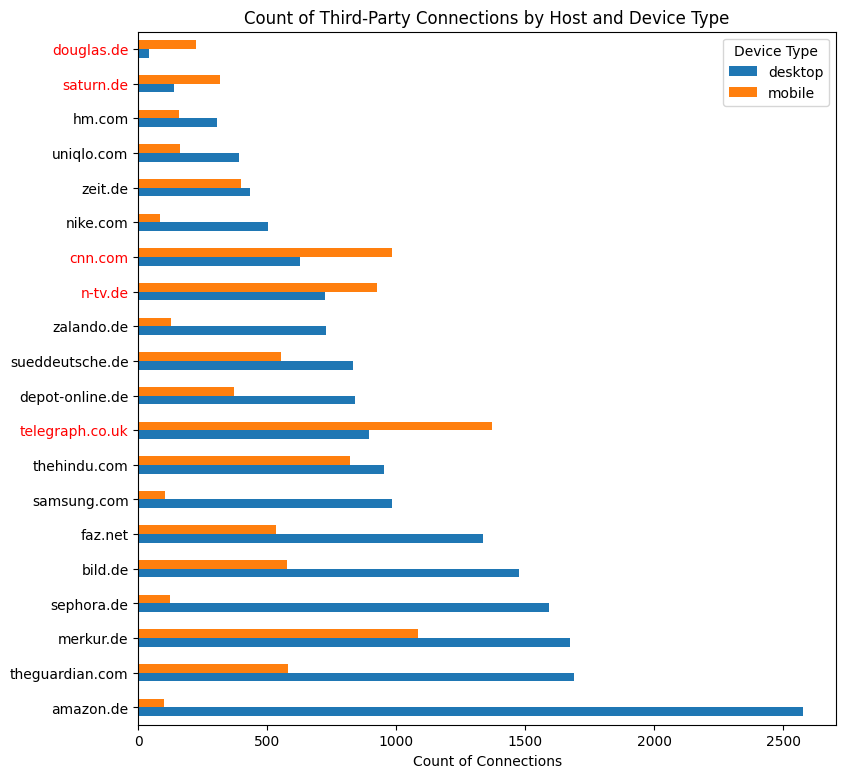

In [69]:
df = pd.DataFrame(data3, columns=['Host', 'Device Type', 'Count'])

pivot_df = df.pivot(index='Host', columns='Device Type', values='Count').fillna(0)

pivot_df = pivot_df.sort_values('desktop', ascending=False)

ax = pivot_df.plot(kind='barh', figsize=(9, 9))

plt.title('Count of Third-Party Connections by Host and Device Type')
plt.xlabel('Count of Connections')
plt.ylabel('')


plt.legend(title='Device Type')

y_labels = ax.get_yticklabels()

for i, row in pivot_df.iterrows():
    if row.get('mobile', 0) > row.get('desktop', 0):
        y_labels[pivot_df.index.get_loc(i)].set_color('red')

ax.set_yticklabels(y_labels)

plt.show()


Total Amount of 3rd party requests

In [70]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT type, COUNT(*) FROM domain_counts GROUP BY type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data2 = cursor.fetchall()

print("Count\tdevice type")
print("----------------------------")
for domain, count in data2:
    print(f"{count}\t{domain}")

conn.close()

Count	device type
----------------------------
18733	desktop
9590	mobile


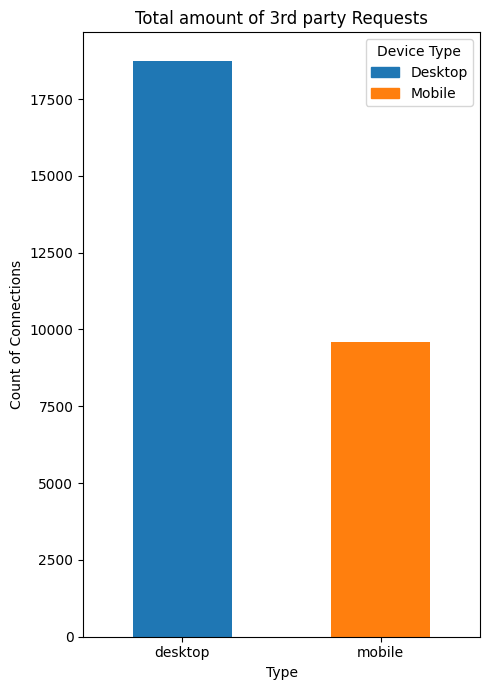

In [74]:
df = pd.DataFrame(data2, columns=['Type', 'Count'])

colors = ['#1f77b4' if website_type == 'desktop' else '#ff7f0e' for website_type in df['Type']]
df.plot(kind='bar', x='Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='Desktop')
other_patch = mpatches.Patch(color='#ff7f0e', label='Mobile')

plt.legend(handles=[news_patch, other_patch], title='Device Type')
plt.title('Total amount of 3rd party Requests')
plt.ylabel('Count of Connections')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### News vs ecommerce

Total Amount of 3rd party requests

In [72]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT website_type, COUNT(*) FROM domain_counts GROUP BY website_type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data4 = cursor.fetchall()

print("Count\twebsite type")
print("----------------------------")
for domain, count in data4:
    print(f"{count}\t{domain}")

conn.close()

Count	website type
----------------------------
18458	news
9865	shops


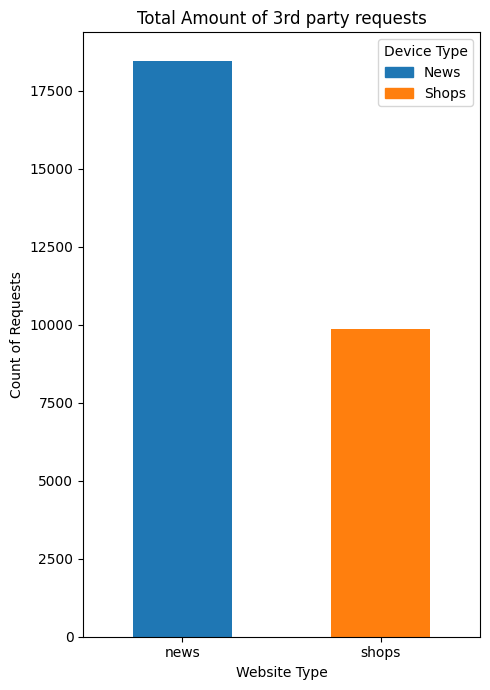

In [73]:
df = pd.DataFrame(data4, columns=['Website Type', 'Count'])

colors = ['#1f77b4' if website_type == 'news' else '#ff7f0e' for website_type in df['Website Type']]
df.plot(kind='bar', x='Website Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='News')
other_patch = mpatches.Patch(color='#ff7f0e', label='Shops')

plt.legend(handles=[news_patch, other_patch], title='Device Type')
plt.title('Total Amount of 3rd party requests')
plt.ylabel('Count of Requests')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()